In [311]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [312]:
import warnings
warnings.filterwarnings("ignore")

In [313]:
os.getcwd()

'/Users/jbrable/M1_S2_Python'

In [314]:
os.listdir()

['predictor.py',
 'processing_airbnb V2-3.ipynb',
 'city_obs.csv',
 'processing_airbnb V2-2.ipynb',
 'city_nan.csv',
 '__pycache__',
 'df_clean.csv',
 'processing_airbnb.ipynb',
 '.ipynb_checkpoints',
 'airbnb-listings.csv',
 'Model_JB.ipynb',
 'processing_airbnb V3.ipynb']

# Data importation

In [351]:
columns = ["Country", "City", "State", "Neighbourhood Cleansed", "Calendar last Scraped",
"Host Since", "Host Response Time", "Host Response Rate", "Calculated host listings count",
"Property Type", "Room Type", "Accommodates", "Bedrooms","Bathrooms", "Beds", "Bed Type",  "Square Feet", "Cancellation Policy",
"Minimum Nights", "Maximum Nights", "Has Availability", "Availability 30", "Availability 60", "Availability 90", "Availability 365",
"Number of Reviews", "Reviews per Month", "First Review", "Last Review", "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness","Review Scores Checkin", "Review Scores Communication", "Review Scores Location","Review Scores Value",
"Features", "Amenities", "Price"]

In [353]:
df = pd.read_csv('airbnb-listings.csv', usecols = columns, sep = ';')

In [317]:
df.head()

,Host Since,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Accommodates,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,2015-10-11,within a few hours,100.0,Lambeth,London,England,United Kingdom,House,Private room,2.0,...,9.0,9.0,10.0,9.0,10.0,10.0,strict,2.0,0.83,Host Has Profile Pic
1,2014-02-01,within an hour,100.0,Lambeth,London,England,United Kingdom,House,Entire home/apt,8.0,...,10.0,10.0,9.0,10.0,9.0,10.0,moderate,1.0,3.73,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,2014-02-26,NaN,NaN,Lambeth,London,NaN,United Kingdom,Apartment,Private room,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"Host Has Profile Pic,Host Identity Verified"
3,2015-03-30,NaN,NaN,Lambeth,London,Greater London,United Kingdom,Apartment,Entire home/apt,6.0,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.11,Host Has Profile Pic
4,2015-05-18,within a day,100.0,Lambeth,London,London,United Kingdom,House,Private room,2.0,...,9.0,9.0,10.0,10.0,9.0,9.0,moderate,1.0,0.18,Host Has Profile Pic


In [318]:
df.shape

(494954, 39)

In [319]:
df.dtypes

Host Since                         object
Host Response Time                 object
Host Response Rate                float64
Neighbourhood Cleansed             object
City                               object
State                              object
Country                            object
Property Type                      object
Room Type                          object
Accommodates                      float64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Square Feet                       float64
Price                             float64
Minimum Nights                    float64
Maximum Nights                    float64
Has Availability                   object
Availability 30                   float64
Availability 60                   float64
Availability 90                   float64
Availability 365                  

## Handling NA values

We do not want any missing value for the target:

In [320]:
df = df[df['Price'].notna()]

In [321]:
#big outlier:
#print(df[df['Bedrooms'] == 96])
df.drop(df[(df['Bedrooms'] == 96)].index, inplace = True)

In [322]:
missing_rate = pd.DataFrame({'count': df.isna().sum(),
                             'rate': (df.isna().sum()*100/df.shape[0])}).sort_values(by = 'rate', ascending = False)
missing_rate

,count,rate
Has Availability,477716,98.094642
Square Feet,474997,97.536320
Review Scores Value,125815,25.834968
Review Scores Checkin,125771,25.825933
Review Scores Location,125720,25.815460
Review Scores Accuracy,125461,25.762277
Review Scores Communication,125263,25.721619
Review Scores Cleanliness,125219,25.712584
Review Scores Rating,124570,25.579318
Reviews per Month,118836,24.401893


Some variables seem to have a lot of nan values. We have to take this problem into account by imputating values (see further). One question could be how to treat qualitative variables also (encoding before fill na).

too much na values : removing "square feet" and "has availibility"

In [323]:
to_drop_1 = missing_rate[missing_rate['rate']>30]
to_drop=["First Review","Last Review"]
df = df.drop(to_drop_1.index, axis = 1)
df=df.drop(columns=to_drop)

In [324]:
df.shape

(486995, 35)

# Dataset exploratory analysis

In [325]:
y = df['Price'] #target

In [326]:
y.isna().sum()

0

Now we don't have any missing value for the target: it is what we wanted.

### Quantitative features

In [327]:
quant = df.select_dtypes(include=[np.number]).drop('Price', axis = 1).columns.values.tolist()
print(f"We have {len(quant)} quantitative features. They are: \n \n {quant}")

We have 21 quantitative features. They are: 
 
 ['Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month']


In [328]:
df[quant].describe()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,374319.000000,486934.000000,485493.000000,486373.000000,486094.000000,486995.000000,4.869950e+05,486995.000000,486995.000000,486995.000000,...,486995.000000,362425.000000,361534.000000,361776.000000,361224.000000,361732.000000,361275.000000,361180.000000,486131.000000,368159.000000
mean,93.395801,3.266391,1.238390,1.356373,1.906629,3.466662,2.157971e+05,9.929509,22.948404,37.852764,...,16.878288,92.891881,9.526767,9.327512,9.691975,9.709119,9.469183,9.322709,6.900259,1.486740
std,17.559664,2.035288,0.576072,0.903671,1.450972,90.098497,2.040855e+07,10.962356,22.321537,33.817527,...,32.504336,8.554332,0.853042,1.036404,0.728864,0.720953,0.804393,0.904332,42.200259,1.737252
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.200000e+01,0.000000,0.000000,0.000000,...,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,100.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,5.000000,17.000000,33.000000,...,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.890000
75%,100.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,...,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.040000
max,100.000000,18.000000,8.000000,10.000000,19.000000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,...,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000



We can check correlations bewteen all quantitative values, pairwise, by doing a heatmap:

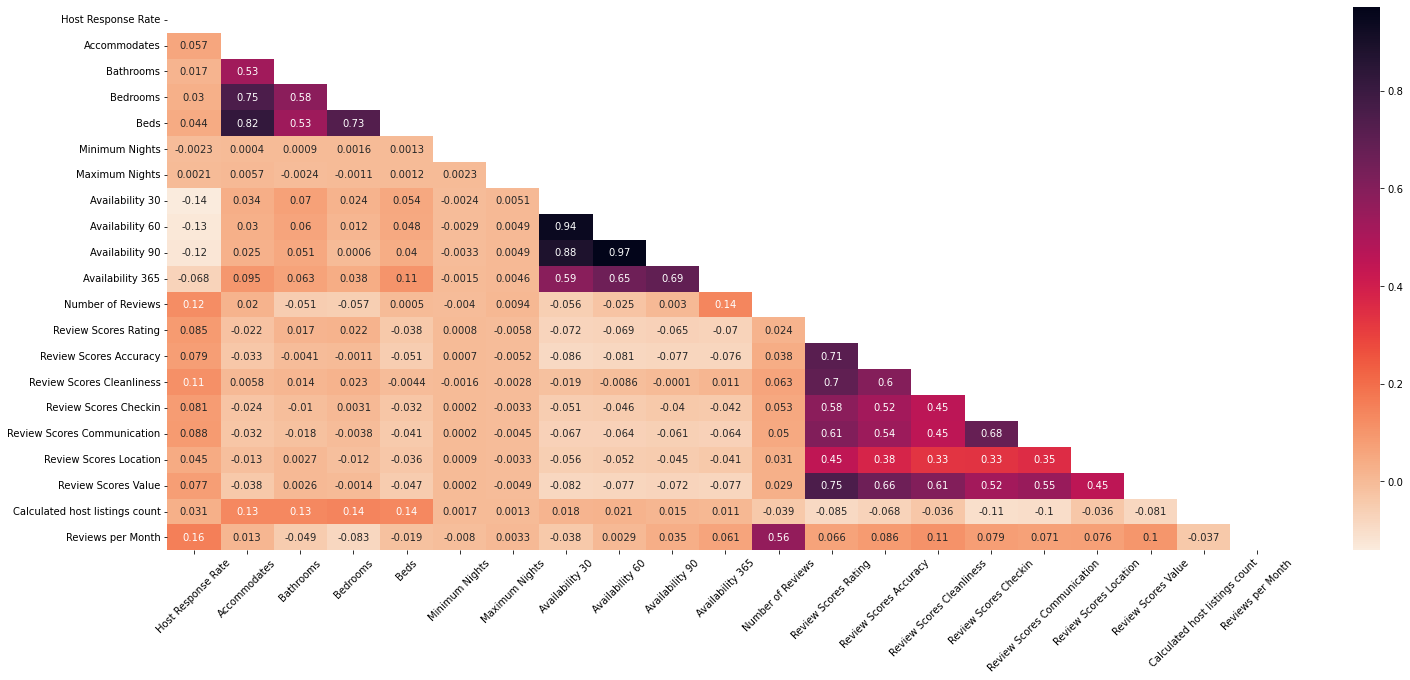

In [329]:
quant_corr = round(df[quant].corr(),4)
mask = np.zeros_like(quant_corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize = (25,10))
sns.heatmap(quant_corr, mask = mask, annot = True, ax = ax, cmap = cmap)
plt.xticks(rotation=45) 

plt.show()

Availability 30, 60 and 90 are very correlated. Thus in order to avoid multicolinearity problem due to redunduncy we are going to keep only Availability 90 (which is the most correlated with the other 2):

In [330]:
df = df.drop(['Availability 60','Availability 30'], axis = 1)
quant = df.select_dtypes(include=[np.number]).drop('Price', axis = 1).columns.values.tolist()

#### Filling NA values for quantitative features

To do so, we are going to group rows by 2 features for which there is not any missing values : 'Room Type' and 'Bed Type'. Then, we are computing the median value of the group for each feature, and finally we assign the corresponding grouped median value for each NaN value.

In [331]:
# first, we identify missing quantitative values:
miss = missing_rate[missing_rate['count'] != 0].index.values.tolist()
quant_to_fill = set(quant) & set(miss)
quant_to_fill

{'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Calculated host listings count',
 'Host Response Rate',
 'Review Scores Accuracy',
 'Review Scores Checkin',
 'Review Scores Cleanliness',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Rating',
 'Review Scores Value',
 'Reviews per Month'}

In [332]:
df[quant].isna().sum()

Host Response Rate                112676
Accommodates                          61
Bathrooms                           1502
Bedrooms                             622
Beds                                 901
Minimum Nights                         0
Maximum Nights                         0
Availability 90                        0
Availability 365                       0
Number of Reviews                      0
Review Scores Rating              124570
Review Scores Accuracy            125461
Review Scores Cleanliness         125219
Review Scores Checkin             125771
Review Scores Communication       125263
Review Scores Location            125720
Review Scores Value               125815
Calculated host listings count       864
Reviews per Month                 118836
dtype: int64

In [333]:
df['Room Type'].sort_values(ascending = False).value_counts()

Entire home/apt    306115
Private room       171965
Shared room          8915
Name: Room Type, dtype: int64

In [334]:
df['Bed Type'].sort_values(ascending = False).value_counts()

Real Bed         470405
Pull-out Sofa      9718
Futon              3574
Couch              1995
Airbed             1303
Name: Bed Type, dtype: int64

In [335]:
df[quant] = df[quant].astype('int', errors = 'ignore')
def my_fill(df, var, g1, g2):
    """
    see above for the description: the idea is to fill the NaN by imputing the grouped mean for each feature
    """
    return(df.groupby([g1, g2])[var].apply(lambda x: x.fillna(round(x.mean(),0))))

for col in quant_to_fill:
    df[col] = my_fill(df = df, var = col, g1 = 'Room Type' , g2 = 'Bed Type')

df[quant].isna().sum()

Host Response Rate                0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Minimum Nights                    0
Maximum Nights                    0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
Reviews per Month                 0
dtype: int64

In [336]:
df[quant].describe()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Minimum Nights,Maximum Nights,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,4.869950e+05,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000,486995.000000
mean,93.334543,3.266444,1.237654,1.356630,1.905432,3.466662,2.157971e+05,37.852764,166.142552,16.878288,92.900001,9.538406,9.243300,9.766205,9.778634,9.493085,9.239337,6.897734,1.468275
std,15.403218,2.035182,0.575335,0.903422,1.450018,90.098497,2.040855e+07,33.817527,140.397590,32.504336,7.383733,0.776966,0.904673,0.644268,0.636576,0.738380,0.791510,42.163035,1.530266
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.200000e+01,0.000000,14.000000,1.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.460000
50%,100.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,33.000000,149.000000,4.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000
75%,100.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.125000e+03,71.000000,313.000000,18.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000
max,100.000000,18.000000,8.000000,10.000000,19.000000,60000.000000,2.147484e+09,90.000000,365.000000,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000


Then we are going to check individual correlations between each quantitative feature and the target (ie the price):

In [337]:
cor_quant_price = pd.DataFrame({'Feature': quant,
                               'Correlation coefficient with the price': 0})

In [338]:
for col in quant:
    cor_quant_price.loc[cor_quant_price['Feature'] == col,
                        'Correlation coefficient with the price']= scipy.stats.pearsonr(df[col], y)[0]
    
cor_quant_price.sort_values(by = 'Correlation coefficient with the price')

,Feature,Correlation coefficient with the price
18,Reviews per Month,-0.102248
9,Number of Reviews,-0.065878
8,Availability 365,-0.026222
7,Availability 90,-0.022602
16,Review Scores Value,-0.004803
6,Maximum Nights,-0.000381
5,Minimum Nights,0.001093
0,Host Response Rate,0.013356
12,Review Scores Cleanliness,0.030979
13,Review Scores Checkin,0.031280


In [339]:
df=df.drop(columns=["Number of Reviews","Accommodates"]) # this 2 columns are very correlated with other columns (beds...)

In [340]:
df

,Host Since,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Bathrooms,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,2015-10-11,within a few hours,100.0,Lambeth,London,England,United Kingdom,House,Private room,1.0,...,9.0,9.0,10.0,9.0,10.0,10.0,strict,2.0,0.83,Host Has Profile Pic
1,2014-02-01,within an hour,100.0,Lambeth,London,England,United Kingdom,House,Entire home/apt,1.5,...,10.0,10.0,9.0,10.0,9.0,10.0,moderate,1.0,3.73,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,2014-02-26,NaN,92.0,Lambeth,London,NaN,United Kingdom,Apartment,Private room,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.00,"Host Has Profile Pic,Host Identity Verified"
3,2015-03-30,NaN,94.0,Lambeth,London,Greater London,United Kingdom,Apartment,Entire home/apt,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.11,Host Has Profile Pic
4,2015-05-18,within a day,100.0,Lambeth,London,London,United Kingdom,House,Private room,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,moderate,1.0,0.18,Host Has Profile Pic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,2015-06-05,within an hour,100.0,Jamaica Estates,Queens,NY,United States,Other,Entire home/apt,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.23,"Host Has Profile Pic,Host Identity Verified,Is..."
494950,2015-05-11,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,...,9.0,7.0,10.0,10.0,10.0,9.0,flexible,1.0,0.38,"Host Has Profile Pic,Host Identity Verified,Is..."
494951,2012-03-22,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,...,10.0,9.0,10.0,10.0,10.0,9.0,flexible,1.0,1.00,"Host Has Profile Pic,Host Identity Verified,Is..."
494952,2016-05-03,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,...,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0,1.00,"Host Has Profile Pic,Is Location Exact"


### Qualitative features

In [342]:
quali = df.select_dtypes(include= [np.object]).columns.values
for col in quali:
    print(f" {col} = {df[col].nunique()} modalités")

 Host Since = 3128 modalités
 Host Response Time = 4 modalités
 Neighbourhood Cleansed = 2377 modalités
 City = 5460 modalités
 State = 1771 modalités
 Country = 22 modalités
 Property Type = 44 modalités
 Room Type = 3 modalités
 Bed Type = 5 modalités
 Amenities = 375950 modalités
 Calendar last Scraped = 50 modalités
 Cancellation Policy = 12 modalités
 Features = 147 modalités


In [343]:
missing_rate = (df[quali].isna().sum()*100/df.shape[0]).sort_values(ascending = False)
missing_rate

Host Response Time        23.136993
State                      9.616731
Amenities                  0.898161
Host Since                 0.100617
City                       0.085627
Features                   0.060781
Property Type              0.002053
Country                    0.000411
Neighbourhood Cleansed     0.000000
Room Type                  0.000000
Bed Type                   0.000000
Calendar last Scraped      0.000000
Cancellation Policy        0.000000
dtype: float64

In [344]:
#Delete row = 406357 because a lot of NaN in this one 
df = df.drop([406357])

In [347]:
quali = df.select_dtypes(include=['object']).columns.tolist()
print(f"We have {len(quali)} qualitative features. They are: \n \n {quali}")

#print(df['Property Type'].value_counts())
#sns.displot(df, x = 'Price', hue = 'Property Type', kind = 'kde')

#print(df['Cancellation Policy'].value_counts())
#sns.displot(df, x = 'Price', hue = 'Cancellation Policy', kind = 'kde')
#print(df['Bed Type'].value_counts())
#sns.boxplot(data = df, x = 'Bed Type', y = 'Price')
#sns.displot(df, x = "Price", hue = "Room Type", kind = "kde")
#from scipy.stats import chisquare
#chisquare(df[['Room Type', 'Bed Type']])

We have 13 qualitative features. They are: 
 
 ['Host Since', 'Host Response Time', 'Neighbourhood Cleansed', 'City', 'State', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar last Scraped', 'Cancellation Policy', 'Features']


There is several qualitative features with a lot of modalities. To handle this, we are going to see if we can group some modalities together, for each qualitative feature.

# Data Wrangling

### Qualitative features

#### Country

In [272]:
# imputation des NaN de la colonne "'Country'"
#df[df[['Country']].isnull().any(axis=1)]

df[df[['Country']].isnull().any(axis=1)]

,Host Since,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Bathrooms,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
145928,2013-08-19,NaN,92.0,Aeropuerto,Salerno,Salerno Fisciano,NaN,House,Private room,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.0,"Host Has Profile Pic,Is Location Exact"
322890,2013-07-31,within an hour,100.0,Trentino,Dro,Trentino-Alto Adige/Südtirol,NaN,Apartment,Entire home/apt,1.0,...,10.0,9.0,10.0,10.0,10.0,9.0,strict,2.0,1.0,Host Has Profile Pic


Because there are only 2 missing values, we search their countries on the internet (both belong to Italy)

In [273]:
df["Country"]=df['Country'].fillna("Italy")
df["Country"]=df["Country"].replace("Hong Kong","China")
#missing_rate = (df[quali].isna().sum()*100/df.shape[0]).sort_values(ascending = False)
#missing_rate



low_count = ["Cuba", "Mexico", "Uruguay", "Vanuatu", "Vatican City"]
df = df[~df["Country"].isin(low_count)]
df['Country'].value_counts()
df.groupby('Country')['Price'].agg(["mean","std"])

,mean,std
Country,,
Australia,165.077177,142.167599
Austria,67.076562,55.017692
Belgium,68.052057,52.079272
Canada,107.010622,89.156506
China,502.111755,220.843221
Denmark,596.433339,199.794412
France,94.431201,73.190026
Germany,57.222044,46.308352
Greece,52.935767,47.095448


#### City

In [274]:
city_obs=pd.DataFrame({"Listings":(df["City"].value_counts())})
city_obs=city_obs.loc[city_obs["Listings"]>100].index.tolist()

In [275]:
city_max=df[df["City"].map(lambda x: x in(city_obs))]

city_max

,Host Since,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Bathrooms,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,2015-10-11,within a few hours,100.0,Lambeth,London,England,United Kingdom,House,Private room,1.0,...,9.0,9.0,10.0,9.0,10.0,10.0,strict,2.0,0.83,Host Has Profile Pic
1,2014-02-01,within an hour,100.0,Lambeth,London,England,United Kingdom,House,Entire home/apt,1.5,...,10.0,10.0,9.0,10.0,9.0,10.0,moderate,1.0,3.73,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,2014-02-26,NaN,92.0,Lambeth,London,NaN,United Kingdom,Apartment,Private room,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.00,"Host Has Profile Pic,Host Identity Verified"
3,2015-03-30,NaN,94.0,Lambeth,London,Greater London,United Kingdom,Apartment,Entire home/apt,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.11,Host Has Profile Pic
4,2015-05-18,within a day,100.0,Lambeth,London,London,United Kingdom,House,Private room,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,moderate,1.0,0.18,Host Has Profile Pic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,2015-06-05,within an hour,100.0,Jamaica Estates,Queens,NY,United States,Other,Entire home/apt,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.23,"Host Has Profile Pic,Host Identity Verified,Is..."
494950,2015-05-11,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,...,9.0,7.0,10.0,10.0,10.0,9.0,flexible,1.0,0.38,"Host Has Profile Pic,Host Identity Verified,Is..."
494951,2012-03-22,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,...,10.0,9.0,10.0,10.0,10.0,9.0,flexible,1.0,1.00,"Host Has Profile Pic,Host Identity Verified,Is..."
494952,2016-05-03,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,...,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0,1.00,"Host Has Profile Pic,Is Location Exact"


Sometimes the same city has been written differently: we have to standardize the name.

In [276]:
city_max["City"]=city_max["City"].replace(['Brussel','Brussels','Bruxelles',], 'Brussels')
city_max["City"]=city_max["City"].replace(['Αθήνα',"Athina"], "Athens")
city_max["City"]=city_max["City"].replace(["Ville de Québec",'Québec','Québec City'], "Quebec")
city_max["City"]=city_max["City"].replace('Venezia', 'Venice')
city_max["City"]=city_max["City"].replace('Roma','Rome')
city_max["City"]=city_max["City"].replace("Saint Kilda East", "Saint Kilda")
city_max["City"]=city_max["City"].replace('Pollensa','Pollença')
city_max["City"]=city_max["City"].replace(['Paris-15E-Arrondissement','Paris-18E-Arrondissement','Paris-19E-Arrondissement','Paris-20E-Arrondissement'],'Paris')
city_max["City"]=city_max["City"].replace('Palma','Palma de Mallorca')
city_max["City"]=city_max["City"].replace(["Londres",'Londra'],'London')
city_max["City"]=city_max["City"].replace('Montréal','Montreal')
city_max["City"]=city_max["City"].replace('København',"Copenhagen")
city_max["City"]=city_max["City"].replace(['Hong Kong','Hong Kong Island','香港'],"Hong Kong")           
city_max["City"]=city_max["City"].replace('Geneva','Genève')
city_max["City"]=city_max["City"].replace('Amsterdam','Amsterdam-Zuidoost')
city_max["City"]=city_max["City"].replace('Alcudia',"Alcúdia") 
city_max["City"]=city_max["City"].replace('Fitzroy','Fitzroy North')
city_max["City"]=city_max["City"].replace('Antwerp','Antwerpen')    
city_max["City"]=city_max["City"].replace(['Bondi','Bondi Beach','Bondi Junction','North Bondi'],"Bondi")
city_max["City"]=city_max["City"].replace('East Melbourne','Melbourne')
city_max["City"]=city_max["City"].replace('Brunswick','Brunswick East')
#city_min["City"].value_counts()
#city_min
df=city_max
set(df["City"].tolist())

{'Abbotsford',
 'Alcúdia',
 'Alexandria',
 'Algaida',
 'Alhambra',
 'Altadena',
 'Amsterdam-Zuidoost',
 'Anderlecht',
 'Andratx',
 'Annandale',
 'Antwerpen',
 'Arcadia',
 'Artà',
 'Astoria',
 'Athens',
 'Austin',
 'Avalon Beach',
 'Balgowlah',
 'Ballsbridge',
 'Balmain',
 'Barcelona',
 'Bellevue Hill',
 'Berlin',
 'Beverly Hills',
 'Bondi',
 'Boston',
 'Brighton',
 'Bromley',
 'Bronte',
 'Bronx',
 'Brooklyn',
 'Brunswick East',
 'Brussels',
 'Burbank',
 'Byron Bay',
 'Cala Ratjada',
 'Calvià',
 'Camperdown',
 'Campos',
 'Can Pastilla',
 'Can Picafort',
 'Capdepera',
 'Carlton',
 'Chatswood',
 'Chicago',
 'Chippendale',
 'Chula Vista',
 'Clovelly',
 'Collingwood',
 'Colònia de Sant Jordi',
 'Coogee',
 'Copenhagen',
 'Cremorne',
 'Cronulla',
 'Croydon',
 'Culver City',
 'Darlinghurst',
 'Dee Why',
 'Denver',
 'Docklands',
 'Double Bay',
 'Drumcondra',
 'Dublin',
 'Edgware',
 'Edinburgh',
 'Elizabeth Bay',
 'Elwood',
 'Enfield',
 'Erskineville',
 'Etterbeek',
 'Fairlight',
 'Felanitx',
 '

#### Host since
Even if we have to treat na issue for Host Since, we will prefere to calculate how long Host is in Airbnb. For this, we use pd.to_datetime as below. We treat this problem before make differences between quantitative and qualitative features (special treatment).


In [277]:
# imputation des NaN de la colonne "Host Since"
df["Host Since"]=pd.to_datetime(df["Host Since"])
df["Calendar last Scraped"]=pd.to_datetime(df["Calendar last Scraped"])
df["How long Host"]=df["Calendar last Scraped"]-df["Host Since"]
df["How long Host"]=df["How long Host"].dt.days
df["How long Host"]=df["How long Host"].fillna(df["How long Host"].median())
df=df.drop(columns=["Host Since","Calendar last Scraped"])



In [278]:
df

,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Bathrooms,Bedrooms,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,How long Host
0,within a few hours,100.0,Lambeth,London,England,United Kingdom,House,Private room,1.0,2.0,...,9.0,10.0,9.0,10.0,10.0,strict,2.0,0.83,Host Has Profile Pic,510.0
1,within an hour,100.0,Lambeth,London,England,United Kingdom,House,Entire home/apt,1.5,4.0,...,10.0,9.0,10.0,9.0,10.0,moderate,1.0,3.73,"Host Is Superhost,Host Has Profile Pic,Host Id...",1127.0
2,NaN,92.0,Lambeth,London,NaN,United Kingdom,Apartment,Private room,1.0,1.0,...,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.00,"Host Has Profile Pic,Host Identity Verified",1102.0
3,NaN,94.0,Lambeth,London,Greater London,United Kingdom,Apartment,Entire home/apt,1.0,2.0,...,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.11,Host Has Profile Pic,705.0
4,within a day,100.0,Lambeth,London,London,United Kingdom,House,Private room,1.0,1.0,...,9.0,10.0,10.0,9.0,9.0,moderate,1.0,0.18,Host Has Profile Pic,656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,within an hour,100.0,Jamaica Estates,Queens,NY,United States,Other,Entire home/apt,1.0,1.0,...,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.23,"Host Has Profile Pic,Host Identity Verified,Is...",699.0
494950,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,7.0,10.0,10.0,10.0,9.0,flexible,1.0,0.38,"Host Has Profile Pic,Host Identity Verified,Is...",725.0
494951,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,9.0,10.0,10.0,10.0,9.0,flexible,1.0,1.00,"Host Has Profile Pic,Host Identity Verified,Is...",1868.0
494952,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,9.0,10.0,10.0,10.0,9.0,moderate,1.0,1.00,"Host Has Profile Pic,Is Location Exact",365.0


#### Amenities: Fill NaN + Encoding

In [279]:
df["Amenities"].astype("str")
df["Amenities"]=df["Amenities"].fillna("No Amenities")
amenities=pd.DataFrame()

In [280]:
#create a list to have all amenities possible
#We create a new df amenities which help us to make greatly our aim.
import itertools
liste_equipements=[]
df["Amenities"]=df["Amenities"].apply(lambda x: x.lower())
#for row in df.index:
 #   liste_equipements.append(df["Amenities"][row].split(","))
#liste_equipements = set(map(lambda x: x.replace(",",""),itertools.chain(*liste_equipements)))
liste_equipements=['garden or backyard', '24-hour check-in', 'translation missing: en.hosting_amenity_50', 'air conditioning', 'fire extinguisher', 'pocket wifi', 'pets live on this property', 'pack ’n play/travel crib', 'indoor fireplace', 'self check-in', 'accessible-height bed', 'firm mattress', 'translation missing: en.hosting_amenity_49', 'extra pillows and blankets', 'hangers', 'firm matress', 'crib', 'beachfront', 'patio or balcony', 'flat smooth pathway to front door', 'buzzer/wireless intercom', 'other pet(s)', 'hair dryer', 'bathtub', 'waterfront', 'hot tub', 'internet', 'shampoo', 'tv', 'wide clearance to bed', 'first aid kit', 'smartlock', 'family/kid friendly', 'cleaning before checkout', 'children’s books and toys', 'oven', 'private living room', 'high chair', 'wide doorway', 'smoking allowed', 'baby monitor', 'stove', 'elevator in building', 'keypad', 'dishwasher', 'smoke detector', 'step-free access', 'table corner guards', 'private bathroom', 'breakfast', 'iron', 'long term stays allowed', 'cooking basics', 'laptop friendly workspace', 'roll-in shower with shower bench or chair', 'lake access', 'cable tv', 'dryer', 'accessible-height toilet', 'luggage dropoff allowed', 'gym', 'baby bath', 'bed linens', 'outlet covers', 'coffee maker', 'stair gates', 'wheelchair accessible', 'doorman', 'refrigerator', 'dog(s)', 'beach essentials', 'game console', 'bbq grill', 'doorman entry', 'changing table', 'free parking on street', 'smart lock', 'fireplace guards', 'cat(s)', 'heating', 'pets allowed', 'washer / dryer', 'wireless internet', 'disabled parking spot', 'kitchen', 'free parking on premises', 'microwave', 'private entrance', 'essentials', 'wide clearance to shower and toilet', 'paid parking off premises', 'grab-rails for shower and toilet', 'ethernet connection', 'dishes and silverware', 'pool', 'lockbox', 'single level home', 'lock on bedroom door', 'hot water', 'ev charger', 'wide hallway clearance', 'no amenities', 'suitable for events', 'room-darkening shades', 'tub with shower bench', 'safety card', 'children’s dinnerware', 'babysitter recommendations', 'host greets you', 'carbon monoxide detector', 'washer', 'window guards', 'path to entrance lit at night']
for elem in liste_equipements:
    amenities[elem]=df["Amenities"].str.contains(elem)




Dictionnaries and lists to structure what variables we keep, which ones we must group in order to be more accurate

In [281]:
liste_to_erase=["translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","9","buzzer/wireless intercom","private living room","wide hallway clearance","room-darkening shades","hot water",
"wide doorway","extra pillows and blankets","pets live on this property"]
dict_new_cat={"baby-friendly":"bed linens,crib,baby monitor,high chair,babysitter recommendations,changing table,outlet covers,baby bath,pack ’n play/travel crib",
              "security":"smoke detector,carbon monoxide detector,first aid kit,fire extinguisher,window guards,lockbox,safety card",
              "secure_access":"doorman,smart lock,smartlock,doorman entry,path to entrance lit at night,private entrance",
              "outdoor":"patio or balcony,bbq grill,garden or backyard",
              "bathroom_essentials":"hair dryer,shampoo",
              "heating":"heating,fireplace guards,indoor fireplace",
              "pool_jacuzzi":"pool,hot tub",
              "clothes_stuff":"washer,dryer,washer / dryer,iron,hangers",
              "not specified": "no amenities",
              "kitchen":"kitchen,dishwasher,dishes and silverware,stove,dishes and silverware,oven",
              "cooking basics":"cooking basics,refrigerator,microwave,coffee maker",
              "tv":"tv,game console,cable tv",
              "family/kid friendly":"family/kid friendly,children’s dinnerware,stair gates,children’s books and toys",
               "internet":"internet,ethernet connection,pocket wifi,wireless internet",
              "easy_to_check_in":"luggage dropoff allowed,self check-in,24-hour check-in",
              "free parking":"free parking on premises,free parking on street",
              "laptop friendly workspace":"laptop friendly workspace,keypad",
              "old_handicap_people_friendly":"single level home,step-free access,wide clearance to bed,wheelchair accessible"}

to_keep1=list(dict_new_cat)
              
to_keep=["pets allowed","long term stays allowed","air conditioning","elevator in building","suitable for events","bathtub","essentials","gym"]



In [282]:
# On enlève les équipements peu présents

for col in amenities.columns:
    if amenities[col].sum()<200:
        liste_to_erase.append(col)

In [283]:
# On va créer nos colonnes catégories spécifiés dans le dictionnaire
mycat = pd.DataFrame(columns = list(dict_new_cat.keys()), index = amenities.index)

for key in mycat.columns:
    toto = dict_new_cat[key].split(',')
    toto.append('sum')
    category = pd.DataFrame(columns = toto, index = amenities.index)
    to_iterate = pd.DataFrame(columns = dict_new_cat[key].split(','))
    for value in to_iterate.columns:
        #listval = pd.DataFrame({ value : [0]*df1.shape[0]})
        category[value] = amenities[value]
    category['sum'] = category[dict_new_cat[key].split(',')].sum(axis = 1)
    mycat[key] = np.where(category['sum']<1,0,1)

            
#df[cle]=df["Amenities"].map(dict_new_cat)
mycat
df.drop(columns="Amenities")


,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Bathrooms,Bedrooms,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,How long Host
0,within a few hours,100.0,Lambeth,London,England,United Kingdom,House,Private room,1.0,2.0,...,9.0,10.0,9.0,10.0,10.0,strict,2.0,0.83,Host Has Profile Pic,510.0
1,within an hour,100.0,Lambeth,London,England,United Kingdom,House,Entire home/apt,1.5,4.0,...,10.0,9.0,10.0,9.0,10.0,moderate,1.0,3.73,"Host Is Superhost,Host Has Profile Pic,Host Id...",1127.0
2,NaN,92.0,Lambeth,London,NaN,United Kingdom,Apartment,Private room,1.0,1.0,...,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.00,"Host Has Profile Pic,Host Identity Verified",1102.0
3,NaN,94.0,Lambeth,London,Greater London,United Kingdom,Apartment,Entire home/apt,1.0,2.0,...,10.0,10.0,10.0,10.0,10.0,strict,1.0,0.11,Host Has Profile Pic,705.0
4,within a day,100.0,Lambeth,London,London,United Kingdom,House,Private room,1.0,1.0,...,9.0,10.0,10.0,9.0,9.0,moderate,1.0,0.18,Host Has Profile Pic,656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,within an hour,100.0,Jamaica Estates,Queens,NY,United States,Other,Entire home/apt,1.0,1.0,...,9.0,10.0,10.0,9.0,9.0,flexible,1.0,2.23,"Host Has Profile Pic,Host Identity Verified,Is...",699.0
494950,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,7.0,10.0,10.0,10.0,9.0,flexible,1.0,0.38,"Host Has Profile Pic,Host Identity Verified,Is...",725.0
494951,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,9.0,10.0,10.0,10.0,9.0,flexible,1.0,1.00,"Host Has Profile Pic,Host Identity Verified,Is...",1868.0
494952,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,9.0,10.0,10.0,10.0,9.0,moderate,1.0,1.00,"Host Has Profile Pic,Is Location Exact",365.0


In [284]:
for col in to_keep:
    mycat[col]=amenities[col].astype(int)


In [285]:
df=pd.concat([df,mycat],axis=1)

In [286]:
df

,Host Response Time,Host Response Rate,Neighbourhood Cleansed,City,State,Country,Property Type,Room Type,Bathrooms,Bedrooms,...,laptop friendly workspace,old_handicap_people_friendly,pets allowed,long term stays allowed,air conditioning,elevator in building,suitable for events,bathtub,essentials,gym
0,within a few hours,100.0,Lambeth,London,England,United Kingdom,House,Private room,1.0,2.0,...,1,0,0,0,0,1,0,0,1,0
1,within an hour,100.0,Lambeth,London,England,United Kingdom,House,Entire home/apt,1.5,4.0,...,1,0,0,0,0,0,0,0,1,0
2,NaN,92.0,Lambeth,London,NaN,United Kingdom,Apartment,Private room,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,NaN,94.0,Lambeth,London,Greater London,United Kingdom,Apartment,Entire home/apt,1.0,2.0,...,1,0,0,0,0,0,0,0,1,0
4,within a day,100.0,Lambeth,London,London,United Kingdom,House,Private room,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,within an hour,100.0,Jamaica Estates,Queens,NY,United States,Other,Entire home/apt,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0
494950,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,0,0,0,0,0,1,0,0,1,1
494951,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,1,0,0,0,1,1,0,0,1,1
494952,NaN,94.0,Financial District,New York,NY,United States,Apartment,Entire home/apt,1.0,0.0,...,0,0,1,0,1,1,0,0,0,1


#### Features 


In [290]:
df["Features"]=df["Features"].fillna("No specified")
df["Features"]=df["Features"].apply(lambda x: x.lower())
Host_Features=["has profile pic","is superhost","identity verified","location exact","instant bookable","require guest phone verification","require guest profile picture","no specified","requires license"]
for elem in Host_Features:
    df[f"Host_{elem}"]=df["Features"].str.contains(elem).astype(int)

#### Cancellation policy

In [291]:
# On rassemble les modalités dans 3 catégories
def xinlist(x):
    if x in ["strict","super_strict_60",'super_strict_30','strict_new','super_strict_60_new','no_refunds']:
        return "strict"
    elif x in ["flexible_new",'long_term',"flexible"]:
        return "flexible"
    else:
        return "moderate"

df["Cancellation Policy"]=df["Cancellation Policy"].map(lambda x: xinlist(x))
df["Cancellation Policy"].value_counts()

strict      176325
flexible    148736
moderate    123196
Name: Cancellation Policy, dtype: int64

#### Bed Type

In [292]:
def bed_encoder(x):
    if x in ['Pull-out Sofa','Futon','Couch','Airbed']:
        return "Couch"
    else:
        return "Bed "
df["Bed Type"]=df["Bed Type"].map(lambda x:bed_encoder(x))
df["Bed Type"].value_counts()

Bed      432413
Couch     15844
Name: Bed Type, dtype: int64

#### Property Type


In [293]:
def prop_encoder(x):
    if x in ['Townhouse','Guesthouse','Vacation home','Casa particular','Bungalow','Earth House','Treehouse','Lighthouse',"House"]:
        return "House"
    
    elif x in ['Bed & Breakfast','Hostel','Heritage hotel (India)','Boutique hotel',"Hotel"]:
        return "Hotel"
    
    elif x in ['Loft','Chalet','Nature lodge','Castle','Guest suite',"Villa"]:
        return "Villa"   
    
    elif x in ['Condominium ','In-law','Timeshare','Serviced apartment','Dorm','Ryokan (Japan)','Pension (Korea)','Entire Floor','Apartment']:
        return "Apartment"
    
    elif x in ['Plane','Van','Parking Space','Igloo','Island','Train','Cave','Tipi','Yurt','Hut','Tent','Camper/RV','Cabin','Boat']:
        return "Atypical housing"
    
    else:
        return "Other"
df["Property Type"]=df["Property Type"].map(lambda x:prop_encoder(x))
df["Property Type"].value_counts()

Apartment           330569
House                84081
Other                12599
Hotel                11304
Villa                 7936
Atypical housing      1768
Name: Property Type, dtype: int64

#### OHE 

In [294]:
df.isna().sum()

Host Response Time                       105041
Host Response Rate                            0
Neighbourhood Cleansed                        0
City                                          0
State                                     44995
                                          ...  
Host_instant bookable                         0
Host_require guest phone verification         0
Host_require guest profile picture            0
Host_no specified                             0
Host_requires license                         0
Length: 65, dtype: int64

In [295]:


#On encode les variables par One hot encoding
var_quali = ["Cancellation Policy",'Host Response Time','Room Type',"Bed Type","Property Type","City"]
dummy= pd.get_dummies(df[var_quali], dummy_na=False, drop_first=True)

#On concat avec notre df
df2 = pd.concat([df,dummy], axis=1)
#On supprime les colonnes initiales
df=df2.drop(columns=var_quali)


In [296]:
df=df.drop(columns="Amenities")
df=df.drop(columns="Features")
df=df.drop(columns="State")


### Quantitative variables
As seen in the matrix of correlation, it seems that Reviews Score variables are strongly correlated. Thus, we will treat this problem using a mean score, which will catch all the informations. 


#### Score

In [297]:
scoring= df[['Review Scores Rating','Review Scores Value','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location',]]
scoring

,Review Scores Rating,Review Scores Value,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location
0,93.0,10.0,9.0,9.0,10.0,9.0,10.0
1,95.0,10.0,10.0,10.0,9.0,10.0,9.0
2,93.0,9.0,9.0,9.0,10.0,10.0,9.0
3,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,93.0,9.0,9.0,9.0,10.0,10.0,9.0
...,...,...,...,...,...,...,...
494949,86.0,9.0,9.0,9.0,10.0,10.0,9.0
494950,88.0,9.0,9.0,7.0,10.0,10.0,10.0
494951,93.0,9.0,10.0,9.0,10.0,10.0,10.0
494952,93.0,9.0,10.0,9.0,10.0,10.0,10.0


In [298]:
# On fait la moyenne des différentes notes
scoring['Review Scores Rating']=scoring['Review Scores Rating']/10
df.insert(0,"mean_rates",scoring.mean(axis=1))

# On enleve le détail des notes
df.drop(["Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness","Review Scores Checkin",
         "Review Scores Communication", "Review Scores Location","Review Scores Value"], axis=1, inplace=True) 
df

,mean_rates,Host Response Rate,Neighbourhood Cleansed,Country,Bathrooms,Bedrooms,Beds,Price,Minimum Nights,Maximum Nights,...,City_Washington,City_Waterloo,City_Waverley,City_Wembley,City_West Hollywood,City_West Melbourne,City_Wien,City_Windsor,City_Woollahra,City_Zetland
0,9.471429,100.0,Lambeth,United Kingdom,1.0,2.0,2.0,44.0,3.0,1125.0,...,0,0,0,0,0,0,0,0,0,0
1,9.642857,100.0,Lambeth,United Kingdom,1.5,4.0,4.0,139.0,3.0,1125.0,...,0,0,0,0,0,0,0,0,0,0
2,9.328571,92.0,Lambeth,United Kingdom,1.0,1.0,1.0,70.0,1.0,1125.0,...,0,0,0,0,0,0,0,0,0,0
3,10.000000,94.0,Lambeth,United Kingdom,1.0,2.0,4.0,70.0,3.0,1125.0,...,0,0,0,0,0,0,0,0,0,0
4,9.328571,100.0,Lambeth,United Kingdom,1.0,1.0,1.0,25.0,1.0,1125.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,9.228571,100.0,Jamaica Estates,United States,1.0,1.0,2.0,69.0,2.0,7.0,...,0,0,0,0,0,0,0,0,0,0
494950,9.114286,94.0,Financial District,United States,1.0,0.0,1.0,150.0,1.0,1125.0,...,0,0,0,0,0,0,0,0,0,0
494951,9.614286,94.0,Financial District,United States,1.0,0.0,1.0,150.0,3.0,14.0,...,0,0,0,0,0,0,0,0,0,0
494952,9.614286,94.0,Financial District,United States,1.0,0.0,2.0,99.0,6.0,67.0,...,0,0,0,0,0,0,0,0,0,0


### Target

In [299]:
# On converti les devises à l'aide des des taux de change de juin 2017
euro = ['Austria','Belgium','France','Germany','Greece','Ireland', 'Italy','Netherlands', 'Spain' ]

#On stock les taux de change dans la colonne
df.loc[df["Country"].isin(euro),"dollar exchange rate"] = 1.17
df.loc[df["Country"]=="Australia", "dollar exchange rate"] = 0.71
df.loc[df["Country"]=="Canada", "dollar exchange rate"] = 0.76
df.loc[df["Country"]=="China", "dollar exchange rate"] = 0.15
df.loc[df["Country"]=="Denmark", "dollar exchange rate"] = 0.16
df.loc[df["Country"]=="Hong Kong", "dollar exchange rate"] = 0.13
df.loc[df["Country"]=="United States", "dollar exchange rate"] = 1.0
df.loc[df["Country"]=="United Kingdom", "dollar exchange rate"] = 1.30
df.loc[df["Country"]=="Switzerland", "dollar exchange rate"] = 1.11

df["Price"] = df["Price"] * df["dollar exchange rate"]
df["dollar exchange rate"].value_counts()
df=df.drop(columns="dollar exchange rate")

In [300]:
# Country dummies

var_quali = ["Country"]
dummy= pd.get_dummies(df[var_quali], dummy_na=False, drop_first=True)
#On concat avec notre df
df2 = pd.concat([df,dummy], axis=1)
#On supprime les colonnes initiales
df=df2.drop(columns=var_quali)

In [301]:
dfclean=df

dfclean=dfclean.drop("Neighbourhood Cleansed",axis=1)
dfclean

,mean_rates,Host Response Rate,Bathrooms,Bedrooms,Beds,Price,Minimum Nights,Maximum Nights,Availability 90,Availability 365,...,Country_France,Country_Germany,Country_Greece,Country_Ireland,Country_Italy,Country_Netherlands,Country_Spain,Country_Switzerland,Country_United Kingdom,Country_United States
0,9.471429,100.0,1.0,2.0,2.0,57.2,3.0,1125.0,89.0,364.0,...,0,0,0,0,0,0,0,0,1,0
1,9.642857,100.0,1.5,4.0,4.0,180.7,3.0,1125.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,9.328571,92.0,1.0,1.0,1.0,91.0,1.0,1125.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,10.000000,94.0,1.0,2.0,4.0,91.0,3.0,1125.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,9.328571,100.0,1.0,1.0,1.0,32.5,1.0,1125.0,89.0,359.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494949,9.228571,100.0,1.0,1.0,2.0,69.0,2.0,7.0,27.0,84.0,...,0,0,0,0,0,0,0,0,0,1
494950,9.114286,94.0,1.0,0.0,1.0,150.0,1.0,1125.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
494951,9.614286,94.0,1.0,0.0,1.0,150.0,3.0,14.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
494952,9.614286,94.0,1.0,0.0,2.0,99.0,6.0,67.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [302]:
dfclean.to_csv("df_clean.csv")